![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)
# <font color='Blue'>Sacadas de Ciência de Dados</font>

# <font color='Brown'> Como Implementar um Sistema de Ciência de dados na Web - Principiantes </font>


![](https://miro.medium.com/max/700/0*dUl9adkhudqin11C)

# Conhecendo o pacote Gradio
![](https://pbs.twimg.com/profile_images/1116115321218146304/2KMkheJx_400x400.png)

https://github.com/gradio-app/gradio/tree/master/demo


https://gradio.app/getting_started

In [ ]:
#Instalação do Pacote
!pip install gradio

# Funcionalidades para Ciência de Dados 

In [18]:
# Criando uma camada de Interação com o usuário
import gradio as gr

def greet(name):
  return "Fala Cientista de Dados  " + name + " Seja bem-vindo"

iface = gr.Interface(fn=greet, inputs="text", outputs="text")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://26710.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7870/',
 'https://26710.gradio.app')

# 1. Exemplo de Implementação de Tratamento de Imagens

In [9]:
# Tratamento de Imagens com o Filtro Sepia
import gradio as gr
import numpy as np

def sepia(img):
  sepia_filter = np.array([[.393, .769, .189],
                           [.349, .686, .168],
                           [.272, .534, .131]])
  sepia_img = img.dot(sepia_filter.T)
  sepia_img /= sepia_img.max()                          
  return sepia_img

iface = gr.Interface(sepia, gr.inputs.Image(shape=(200, 200)), "image")
iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://27859.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7863/',
 'https://27859.gradio.app')

# 2. Exemplo de implementação de Reconhecimento de Imagens

In [19]:
# Reconhecimento de Imagens

import gradio as gr
import tensorflow as tf
import numpy as np
import requests

inception_net = tf.keras.applications.InceptionV3() # load the model

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def classify_image(inp):
  inp = inp.reshape((-1, 299, 299, 3))
  inp = tf.keras.applications.inception_v3.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(299, 299))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=classify_image, inputs=image, outputs=label, capture_session=True).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://40610.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7871/',
 'https://40610.gradio.app')

https://gradio.app/ml_examples

# 3. Sistema de Saúde para Detecção de Doenças

In [12]:
!pip install fpdf

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=0768083ce40310a80ba65e0c77747156015ca4bdd7ac517480a740580bbcc005
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf


In [13]:
import gradio as gr
import numpy as np
from fpdf import FPDF
import os
import tempfile

# Detecção de Doenças
def disease_report(img, scan_for, generate_report):
    results = []
    for i, mode in enumerate(["Red", "Green", "Blue"]):
        color_filter = np.array([0, 0, 0])
        color_filter[i] = 1
        results.append([mode, img * color_filter])
    tmp_dir = tempfile.gettempdir()
    report = os.path.join(tmp_dir, "report.pdf")
    if generate_report:
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=15)
        pdf.cell(200, 10, txt="Disease Report", 
                ln=1, align='C')
        pdf.cell(200, 10, txt="A Gradio Demo.",
                ln=2, align='C')
        pdf.output(report)
    return results, report if generate_report else None

iface = gr.Interface(disease_report, 
    [
        "image", 
        gr.inputs.CheckboxGroup(["Cancer", "Rash", "Heart Failure", "Stroke", "Diabetes", "Pneumonia"]),
        "checkbox"
    ],
    [
        gr.outputs.Carousel(["text", "image"], label="Disease"),
        gr.outputs.File(label="Report")
    ],
    title="Disease Report",
    description="Upload an Xray and select the diseases to scan for.",
    theme="compact",
    flagging_options=["good", "bad", "etc"],
    allow_flagging="auto"
)

if __name__ == "__main__":
    iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://57878.gradio.app
Interface loading below...


# 4. Sistema de Previsão de Preço de Ativos Financeiros

In [14]:
import gradio as gr
import random
import matplotlib.pyplot as plt
import numpy as np


def plot_forecast(final_year, companies, noise, show_legend, point_style):
    start_year = 2020
    x = np.arange(start_year, final_year + 1)
    year_count = x.shape[0]
    plt_format = ({"cross": "X", "line": "-", "circle": "o--"})[point_style]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i, company in enumerate(companies):
        series = np.arange(0, year_count, dtype=float)
        series = series ** 2 * (i + 1)
        series += np.random.rand(year_count) * noise
        ax.plot(x, series, plt_format)
    if show_legend:
        plt.legend(companies)
    plt.close()
    return fig


iface = gr.Interface(plot_forecast,
             [
                 gr.inputs.Radio([2025, 2030, 2035, 2040],
                                 label="Project to:"),
                 gr.inputs.CheckboxGroup(
                     ["Google", "Microsoft", "Gradio"], label="Company Selection"),
                 gr.inputs.Slider(1, 100, label="Noise Level"),
                 gr.inputs.Checkbox(label="Show Legend"),
                 gr.inputs.Dropdown(["cross", "line", "circle"], label="Style"),
             ],
             gr.outputs.Image(plot=True, label="forecast") 
             )

if __name__ == "__main__":
    iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://54057.gradio.app
Interface loading below...


# 5. Sistema de Previsão de Vendas dos Funcionários

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://57963.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7868/',
 'https://57963.gradio.app')

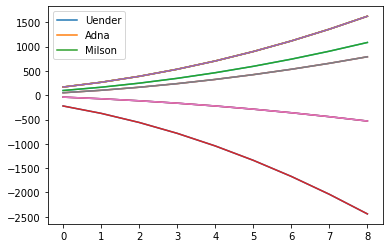

In [16]:
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sales_projections(employee_data):
    sales_data = employee_data.iloc[:, 1:4].astype("int").to_numpy()
    regression_values = np.apply_along_axis(lambda row: 
        np.array(np.poly1d(np.polyfit([0,1,2], row, 2))), 0, sales_data)
    projected_months = np.repeat(np.expand_dims(
        np.arange(3,12), 0), len(sales_data), axis=0)
    projected_values = np.array([
        month * month * regression[0] + month * regression[1] + regression[2]
        for month, regression in zip(projected_months, regression_values)])
    plt.plot(projected_values.T)
    plt.legend(employee_data["Name"])
    return employee_data, plt.gcf(), regression_values

iface = gr.Interface(sales_projections, 
    gr.inputs.Dataframe(
        headers=["Name", "Jan Sales", "Feb Sales", "Mar Sales"],
        default=[["Uender", 12, 14, 18], ["Adna", 14, 17, 2], ["Milson", 8, 9.5, 12]]
    ),
    [
        "dataframe",
        "plot",
        "numpy"
    ],
    description="Enter sales figures for employees to predict sales trajectory over year."
)
iface.launch()

#Fim

## Valeu!

### # Onde me Encontrar - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [4]:
from IPython.core.display import HTML
HTML('<iframe width="400" height="280" src="https://www.youtube.com/embed/B5zelIWz8O0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')